# Criando um problema para busca local

Começamos por carregar as bibliotecas (pacotes) que vamos utilizar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos começar por gerar uma função que pase exatamente por quatro pontos no espaço. Para isto vamos usar um polinômio interpolador de Lagrange. 

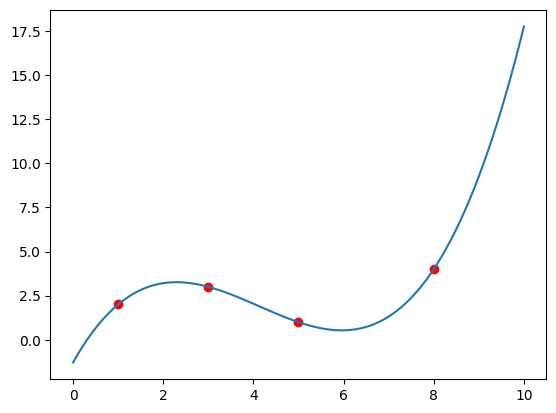

In [2]:
x = np.array([1.0, 3.0, 5.0, 8.0])
y = np.array([2.0, 3.0, 1.0, 4.0])

def pLagrange(x, x_i, y_i):
    n = len(x_i)
    L = np.zeros(n)
    for i in range(n):
        L[i] = np.prod([(x - x_i[j])/(x_i[i] - x_i[j]) for j in range(n) if i != j])
    #print(L.shape)
    #print(y_i.shape)
    return np.dot(y_i, L)

x_inter = np.linspace(0, 10, 100)
y_inter = [pLagrange(xi, x, y) for xi in x_inter]

plt.plot(x_inter, y_inter, label='Interpolação de Lagrange')
plt.scatter(x, y, label='Pontos Conhecidos', color='red')

Vamos fazer uma variação da função de interpolação.

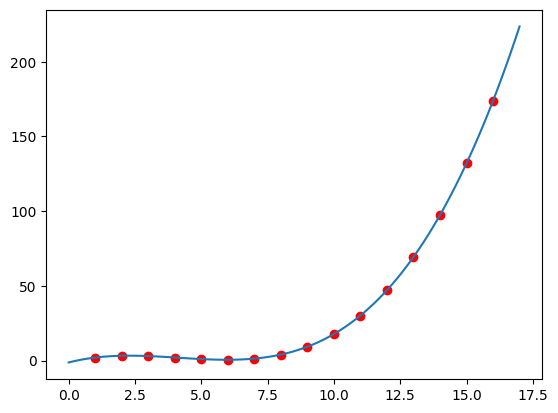

In [3]:
x = np.array(range(1, 17), dtype=np.float64) # 16 pontos
y = np.random.uniform(-50, 50, 16)          # 16 valores aleatórios
# definindo os valores de y para os 8 primeiros pontos
y[:8] = np.array([2.0, -10.0, 3.0, -20.0, 1.0, -30.0, -40.0, 4.0], dtype=np.float64)

# definindo o vetor de pesos
w = np.zeros(16, dtype=np.uint8)
# definindo os pesos para os 8 primeiros pontos
w[:8] = np.array([1, 0, 1, 0, 1, 0, 0, 1], dtype=np.uint8)

def pLagrangeW(x, x_i, y_i, w):
    # Vamos gerar o polinômio de Lagrange apenas com os pontos que possuem peso 1
    x_ = x_i[w == 1]
    y_ = y_i[w == 1]
    return pLagrange(x, x_, y_)

x_inter = np.linspace(0, 17, 100)
y_inter = np.array([pLagrangeW(xi, x, y, w) for xi in x_inter])
xobj = x.copy()
yobj = np.array([pLagrangeW(xi, x, y, w) for xi in xobj])

plt.plot(x_inter, y_inter, label='Interpolação')
plt.scatter(xobj, yobj, label='Pontos Conhecidos', color='red')

Nossa função objetivo pode ser definida como a distância de cada ponto ao polinômio de interpolação.

In [4]:
def distQuad(y_inter, y):
    n = len(y)
    return np.sqrt((np.sum((y_inter - y)**2))/n)

y_inter = np.array([pLagrangeW(xi, xobj, yobj, w) for xi in xobj])
print(distQuad(y_inter, yobj))

0.0


Se mudamos os pesos teremos um polinômio de interpolação 

In [5]:
W = np.array(range(1,2**16))
print(len(W))


65535


(16,)
(16,)
(16,)


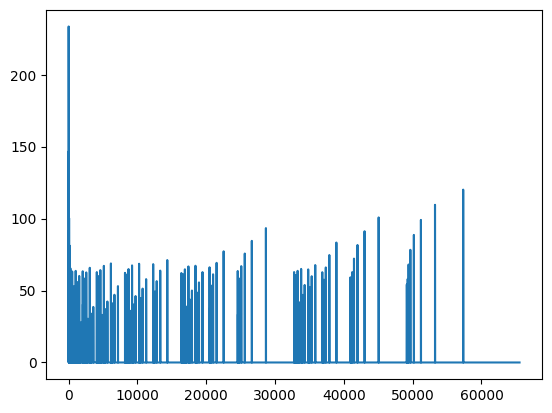

In [6]:
def int_to_bin_list(n):
    binList = [int(digit) for digit in bin(n)[2:]]
    binList = [0]*(16-len(binList)) + binList
    return binList

print(x.shape)
print(y.shape)
print(xobj.shape)

custo = np.zeros_like(W, dtype=np.float64)
for i, wi in enumerate(W):
    w = np.array(int_to_bin_list(wi)) #lista de 0 e 1 correspondente á representação binaria de wi
    y_inter = np.array([pLagrangeW(xi, xobj, yobj, w) for xi in xobj])
    custo[i] = distQuad(y_inter, yobj)

plt.plot(W, custo, label='Custo')

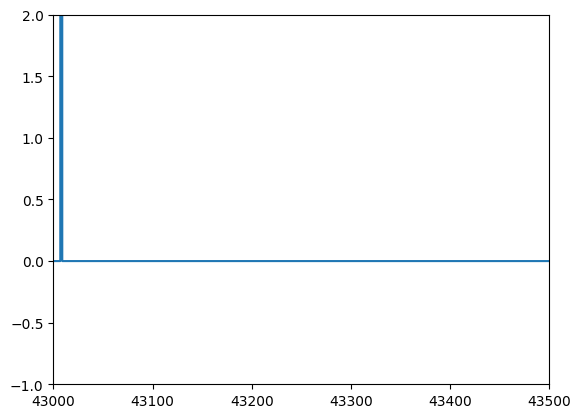

In [8]:
plt.ylim(bottom=-1)
plt.ylim(top=2)
plt.xlim(left=43000, right=43500)
plt.plot(W, custo, label='Custo')